<a href="https://colab.research.google.com/github/rakeshgeddam/KE_Prediction/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/content/bullet_data-cons.csv")[['z1','z2','KE','invel']]

df.head()

,z1,z2,KE,invel
0,32.569867,-10.0,154.66851,1
1,32.489867,-10.0,154.66851,1
2,32.409867,-10.0,154.66851,1
3,32.329867,-10.0,154.66851,1
4,32.249867,-10.0,154.66851,1


<ipython-input-10-61203d49a7fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['z1'] = df_8['z1'].iloc[0] - df_8['z1']


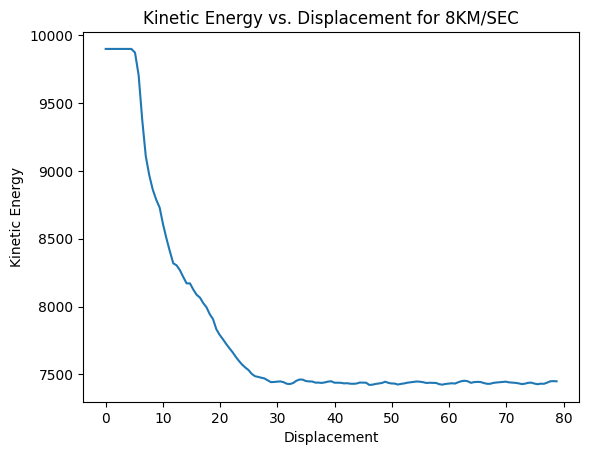

In [ ]:
df_8 = df.loc[df['invel'] == 8]
df_8['z1'] = df_8['z1'].iloc[0] - df_8['z1']
plt.xlabel("Displacement")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy vs. Displacement for 8KM/SEC")
x = df_8['z1']
y = df_8['KE']

plt.plot(x,y)

In [ ]:
df_8.head(15)

,z1,z2,KE,invel
2380,0.000000,-80.000000,9898.784639,8
2381,0.640000,-80.000000,9898.784639,8
2382,1.280000,-80.000000,9898.784639,8
2383,1.920000,-80.000000,9898.784639,8
2384,2.560000,-80.000000,9898.784639,8
2385,3.200000,-80.000000,9898.784639,8
2386,3.840000,-80.000000,9898.784639,8
2387,4.480000,-80.000000,9898.784639,8
2388,5.119856,-79.891106,9871.855765,8
2389,5.756748,-79.209906,9704.244847,8


<ipython-input-13-8a970d14f3c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['derivative'] = derivative_approximation
<ipython-input-13-8a970d14f3c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  through_first_dip['derivative_diff'] = through_first_dip['derivative'].iloc[0] - through_first_dip['derivative']


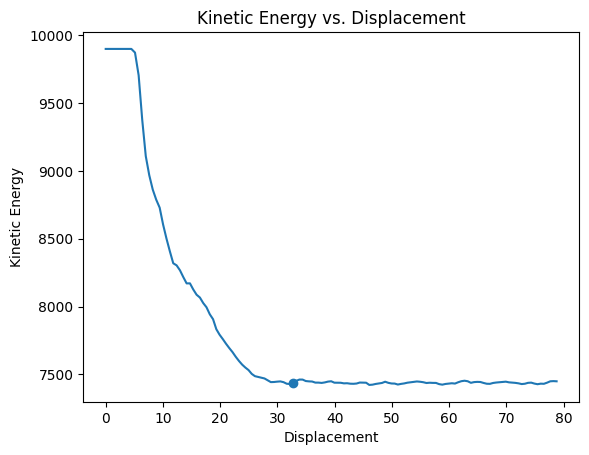

In [ ]:
derivative_approximation = np.diff(y) / np.diff(x)
derivative_approximation = np.append(derivative_approximation, derivative_approximation[-1])


df_8['derivative'] = derivative_approximation
through_first_dip = df_8.loc[df_8['derivative'] != 0.0]
through_first_dip['derivative_diff'] = through_first_dip['derivative'].iloc[0] - through_first_dip['derivative']
first_final = through_first_dip.loc[through_first_dip['derivative_diff'].idxmin()]
plt.scatter(first_final['z1'], first_final['KE'])
plt.xlabel("Displacement")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy vs. Displacement")
plt.plot(x,y)

,z1,z2,KE,invel,derivative
2380,0.00,-80.0,9898.784639,8,0.0
2381,0.64,-80.0,9898.784639,8,0.0
2382,1.28,-80.0,9898.784639,8,0.0
2383,1.92,-80.0,9898.784639,8,0.0
2384,2.56,-80.0,9898.784639,8,0.0


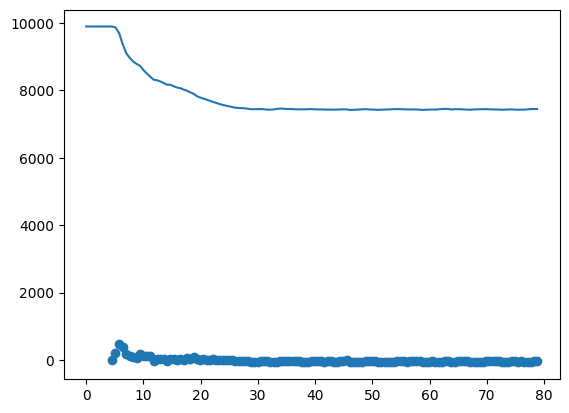

In [ ]:
plt.scatter(through_first_dip['z1'],through_first_dip['derivative_diff'])
plt.plot(df_8['z1'],df_8['KE'])

df_8.head()

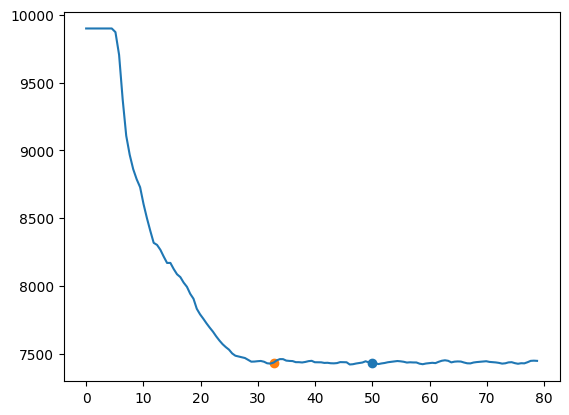

In [ ]:
after_first_final = through_first_dip.loc[through_first_dip['KE'] <= first_final['KE']]
final_disp = after_first_final['KE'].mean()

final_disp

plt.scatter(50,final_disp)
plt.scatter(first_final['z1'], first_final['KE'])
plt.plot(df_8['z1'],df_8['KE'])

data_dic = {"invel":[],"average_KE":[],"standard_deviation":[]}

# **The Dataframe is sliced into theit particular initial velocities and the Final Kinetic Energy is being derived using difference of derivative distance of the individual curves for Initial speed  >= 5 where we have observed that the material started breaking**

{5: 1.1320361638398182, 6: 9.0630449842295, 8: 6.822414310530808, 10: 12.197119448263269, 12: 20.25795770665078}


,invel,first_disp,first_ke,final_disp,final_KE,change_in_KE,std
0,5,32.265867,3866.712750,55.937664,778.763481,3087.949269,1.132036
1,6,32.189867,5568.066360,58.003590,3093.262918,2474.803442,9.063045
2,8,32.037867,9898.784639,55.763520,7438.465143,2460.319496,6.822414
3,10,31.885867,15466.851000,58.318897,12401.610170,3065.240830,12.197119
4,12,31.733867,22272.265440,70.380792,17725.822484,4546.442956,20.257958


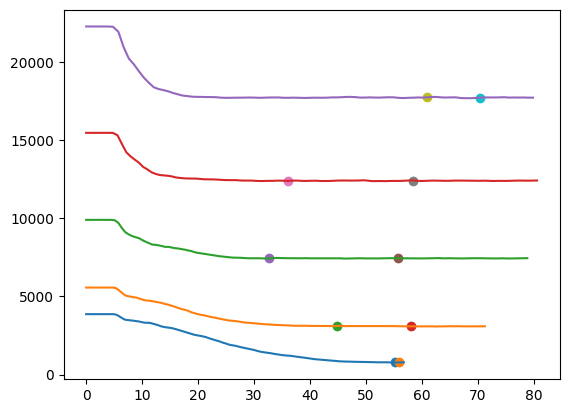

In [ ]:
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")
breaking_invels = [5,6,8,10,12]
op_dtst = {"invel":[],"first_disp":[],"first_ke":[],"final_disp":[],"final_KE":[],"change_in_KE":[],"std":[]}
std = {}
variance = {}
for i in breaking_invels:
    curr_df = df.loc[df['invel'] == i]
    op_dtst['invel'].append(i)
    op_dtst['first_disp'].append(curr_df['z1'].iloc[0])
    op_dtst['first_ke'].append(curr_df['KE'].iloc[0])
    curr_df['z1'] = curr_df['z1'].iloc[0] - curr_df['z1']
    # curr_df['z2'] = abs(curr_df['z2'])

    x = curr_df['z1']
    y = curr_df['KE']
    plt.plot(x,y)
    derivative_approximation = np.diff(y) / np.diff(x)
    derivative_approximation = np.append(derivative_approximation, derivative_approximation[-1])
    first_derivative_value = derivative_approximation[0]
    curr_df['derivative'] = derivative_approximation
    # print(curr_df.head())
    #min_derivative_row = curr_df.loc[curr_df['derivative'].idxmin()]
    #after_first_dip = curr_df.loc[curr_df['z1'] > min_derivative_row['z1']]
    #curr_df['dervative_diff'] = curr_df['derivative'].iloc[0] - curr_df['derivative']
    through_first_dip = curr_df.loc[curr_df['derivative'] != 0.0]
    through_first_dip['derivative_diff'] = through_first_dip['derivative'].iloc[0] - through_first_dip['derivative']
    first_final = through_first_dip.loc[through_first_dip['derivative_diff'].idxmin()]
    # print(first_final)
    plt.scatter(first_final['z1'], first_final['KE'])
    #========================================================
    #       Code to find the mean of the remaining final kinetic energies
    #========================================================
    after_first_final = through_first_dip.loc[through_first_dip['z1'] >= first_final['z1']]
    final_disp = after_first_final['z1'].mean()
    final_average_KE = after_first_final['KE'].mean()
    std[i] = after_first_final['KE'][5:-2].std()
    variance[i] =  after_first_final['KE'].var()
    plt.scatter(final_disp,final_average_KE)
    #op_dtst = {"invel":[],"first_disp":[],"first_ke":[],"final_disp":[],"final_KE":[],"change_in_KE":[]}
    op_dtst['final_disp'].append(final_disp)
    op_dtst['final_KE'].append(final_average_KE)
    op_dtst['change_in_KE'].append(curr_df['KE'].iloc[0] - final_average_KE)
    #curr_df.to_csv(f"{i}.csv")
    #plt.plot(after_first_dip['z1'], after_first_dip['derivative'])
    # plt.plot(curr_df['z1'], curr_df['derivative'])
    #break
    # plt.plot(x[:-1], derivative_approximation, label='Derivative Approximation', color='orange')
    # constant_velocity_point = np.where(np.gradient(curr_df['KE']) <= 0)[0][0]
    # print(curr_df['z1'].to_numpy()[constant_velocity_point])
    # plt.scatter(i, smallest_point)

print(std)
# print(variance)
for i in std.keys():
    op_dtst["std"].append(std[i])
op_df = pd.DataFrame(op_dtst)

op_df



# **Using Logarthmic Regression from Linear Regression CLass of Sklean.linear_model**

,invel,first_disp,first_ke,final_disp,final_KE,change_in_KE
0,5,32.265867,3866.712750,55.937664,778.763481,3087.949269
1,6,32.189867,5568.066360,58.003590,3093.262918,2474.803442
2,8,32.037867,9898.784639,55.763520,7438.465143,2460.319496
3,10,31.885867,15466.851000,58.318897,12401.610170,3065.240830
4,12,31.733867,22272.265440,70.380792,17725.822484,4546.442956
0,7,32.087571,9208.807863,58.366937,6242.579753,2966.228110
1,9,31.936141,14355.038661,61.432555,11013.824132,3341.214528


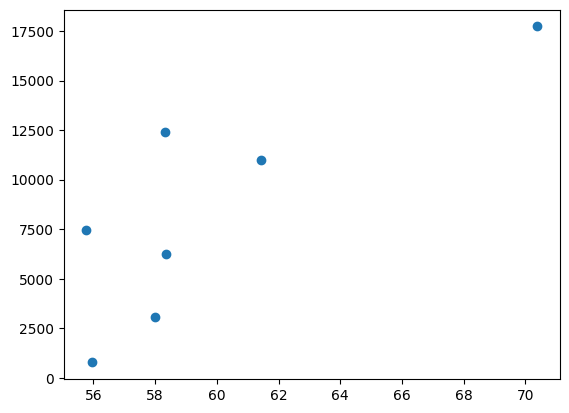

In [ ]:
from sklearn.linear_model import LinearRegression
op_dtst2 = {"invel":[],"first_disp":[],"first_ke":[],"final_disp":[],"final_KE":[],"change_in_KE":[]}
X = op_df[["invel"]]
y_final_ke = op_df["final_KE"]
y_first_ke = op_df["first_ke"]
y_final_disp = op_df["final_disp"]
y_first_disp = op_df['first_disp']

X_log = np.log(X) # Apply logarithmic transformation to initial_velocity

# Create and train separate models for all the dependent variables in the dataframe
model_final_ke = LinearRegression()
model_final_ke.fit(X_log, y_final_ke)

model_first_ke = LinearRegression()
model_first_ke.fit(X_log, y_first_ke)

model_first_disp = LinearRegression()
model_first_disp.fit(X_log, y_first_disp)

model_final_disp = LinearRegression()
model_final_disp.fit(X_log, y_final_disp)

# Predict for invels 7 and 9 (after logarithmic transformation)
new_invels = np.log([7, 9])

predicted_final_ke = model_final_ke.predict(new_invels.reshape(-1, 1))
predicted_first_ke = model_first_ke.predict(new_invels.reshape(-1, 1))
predicted_final_disp = model_final_disp.predict(new_invels.reshape(-1, 1))
predicted_first_disp = model_first_disp.predict(new_invels.reshape(-1, 1))

for idx,itr in enumerate([7,9]):
    op_dtst2['invel'].append(itr)
    op_dtst2['final_KE'].append(predicted_final_ke[idx])
    op_dtst2['first_ke'].append(predicted_first_ke[idx])
    op_dtst2['first_disp'].append(predicted_first_disp[idx])
    op_dtst2['change_in_KE'].append(predicted_first_ke[idx] - predicted_final_ke[idx])
    op_dtst2['final_disp'].append(predicted_final_disp[idx])

op_df_2 = pd.DataFrame(op_dtst2)
op_df3 = pd.concat([op_df,op_df_2])
# df_plot = df
# df_plot['z1'] = df_plot['z1'].iloc[0] - df_plot['z1']
# plt.scatter(df_plot['z1'],df_plot['KE'])
plt.scatter(op_df3['final_disp'],op_df3['final_KE'])
op_df3


# **Trying to find out the final kinetic energy for initial speeds 1-4 where the material does not break**

,invel,first_disp,first_ke,final_disp,final_ke,disp_at_bounce,ke_at_bounce
0,1,0.0,154.66851,8.347462,8.228400,19.203580,0.039924
1,2,0.0,618.67404,19.175650,27.655293,25.747520,0.035236
2,4,0.0,2474.69616,35.406972,41.504776,36.833155,0.309437


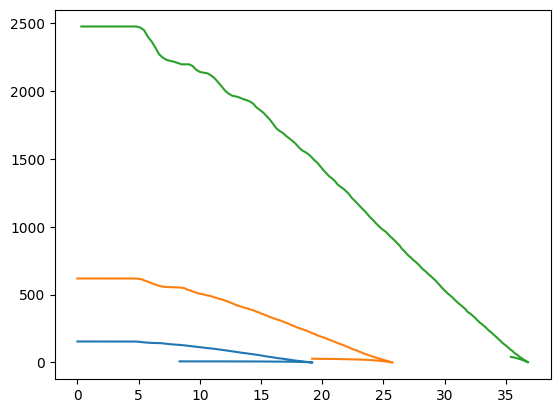

In [ ]:
vels = [1,2,4]
lower_vel = {"invel":[],"first_disp":[],"first_ke":[],"final_disp":[],"final_ke":[],"disp_at_bounce":[],"ke_at_bounce":[]}
for i in vels:
    curr_df = df.loc[df['invel'] == i]
    displacement = curr_df['z1'].iloc[0] - curr_df['z1']
    kinetic_energy = curr_df['KE']
    lower_vel['invel'].append(i)
    lower_vel['first_disp'].append(displacement.iloc[0])
    lower_vel['first_ke'].append(curr_df['KE'].iloc[1])
    lower_vel['final_disp'].append(displacement.iloc[-1])
    lower_vel['final_ke'].append(curr_df['KE'].iloc[-1])
    at_bounce = curr_df.loc[curr_df['KE'].idxmin()]
    lower_vel['disp_at_bounce'].append(curr_df['z1'].iloc[0] -  at_bounce['z1'])
    lower_vel['ke_at_bounce'].append(at_bounce['KE'])
    plt.plot(displacement,kinetic_energy)

lower_df = pd.DataFrame(lower_vel)
lower_df

#lower_vel

Predicted values: [3.00000000e+00 0.00000000e+00 1.61297160e+03 2.69038071e+01
 3.27940127e+01 3.11473200e+01 1.92592269e-01]


,invel,first_disp,first_ke,final_disp,final_ke,disp_at_bounce,ke_at_bounce
0,1.0,0.0,154.668510,8.347462,8.228400,19.203580,0.039924
1,2.0,0.0,618.674040,19.175650,27.655293,25.747520,0.035236
2,4.0,0.0,2474.696160,35.406972,41.504776,36.833155,0.309437
0,3.0,0.0,1612.971604,26.903807,32.794013,31.147320,0.192592


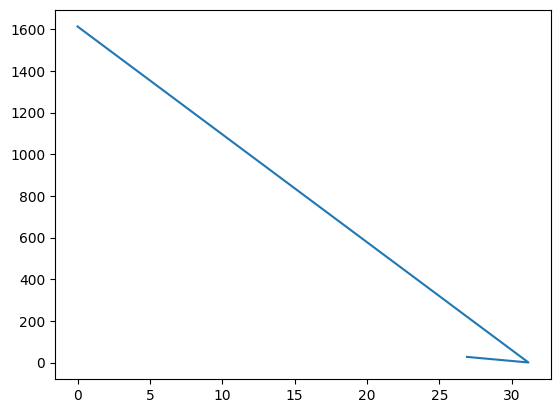

In [ ]:
# Load the dataset
data = lower_df
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
X = data[["invel"]]
Y = data

l_dtst = {"invel":[],"first_disp":[],"first_ke":[],"final_disp":[],"final_ke":[],"disp_at_bounce":[],"ke_at_bounce":[]}
model = MultiOutputRegressor(LinearRegression())
model.fit(X, Y)

# New values of invel
new_invels = [[3]]  # Example new values

# Predict all target columns for the new invels
predicted_values = model.predict(new_invels)
print("Predicted values:", predicted_values[0])

for idx,key in enumerate(l_dtst.keys()):
    l_dtst[key].append(predicted_values[0][idx])

displacements = [l_dtst[x] for x in ['first_disp','disp_at_bounce','final_disp']]
kes = [ l_dtst[x] for x in ['first_ke','ke_at_bounce','final_disp']]

plt.plot(displacements,kes)

# l_dtst
final_df = pd.concat([lower_df,pd.DataFrame(l_dtst)])
final_df